# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных:

**airports_nearest**— расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

display(data.head())

data.info()

print('\nЧисло дубликатов:', data.duplicated().sum())

data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


**Вывод**

* Всего 23699 записи. 
* Для целого ряда столбцов есть пропущенные значения и некорректный тип данных.  Что касается пропусков то по ряду столбцов:balcony, parks_around3000,ponds_aroun3000, -подходящих значений просто нет (такие пропуски подлежат логической замене на 0). По поводу пропусков в day_exposition можно предположить что это обьявления которые не были закрыти к моменту выгрузки данных, но это уже гипотеза, которую попробуем проверить ниже. 
* По ряду признаков есть аномальные значения (визуально, в редких случаях слишком высокая стоимость квартир). А так же среднее значение меньше медианы -> распределение имеет отрицательный перекос и возможно имеет место искажение. Поэтому будем заменять в необходимых столбцах пустые значения медианойБ так как в лучаях выбросов в значении среднего будут преобладать выбросы, а не типичные значения.

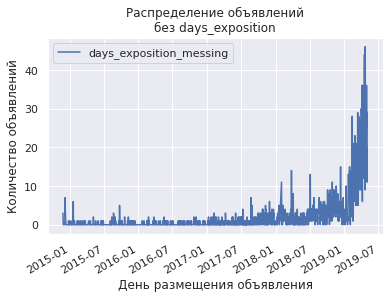

In [2]:
test= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
test['first_day_exposition']= pd.to_datetime(test['first_day_exposition'])
# Зададим новый столбец, который определяет пропущена дата или нет
test['days_exposition_messing'] = test['days_exposition'].isna().astype(int)
# сформируеи и построим график
test.groupby('first_day_exposition').agg({'days_exposition_messing': 'sum'}).plot()
plt.xlabel('День размещения объявления'), plt.ylabel('Количество объявлений')
plt.title('Распределение объявлений\nбез days_exposition')
plt.show()

Гипотеза подтвердилась - число пропусков растет к концу наблюдаемого периода,где пропуски озачают незакрытие объявления.

## Предобработка данных

In [3]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Выясняем количество значений в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на нет
data['is_apartment'] = data['is_apartment'].fillna(value=False)
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

# Смотрим количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Приводим этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)

# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# Проверяем количество пропущенных значений
data.isnull().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

## Расчёты и добавление результатов в таблицу

In [5]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,9999,120370,3,3,2019,47,23,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81,82920,1,12,2018,46,27,первый
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,92785,3,8,2015,61,14,другой
3,0,64900000,159.00,2015-07-24,3,2.60,14,90.82,9,False,False,False,27.84,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,408176,4,7,2015,57,17,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,100000,1,6,2018,32,41,другой


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

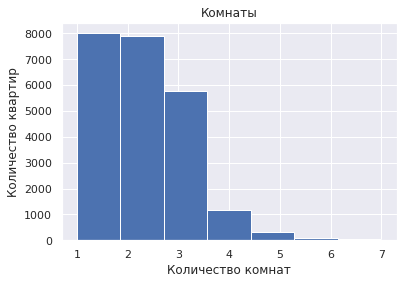

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


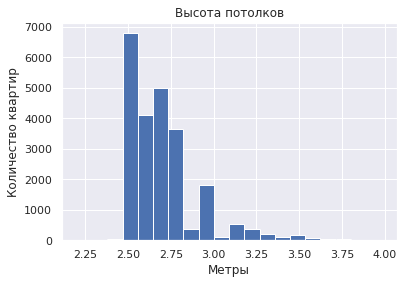

Наибольшие по высоте потолков варианты:
22869   100.00
22336    32.00
3148     32.00
21377    27.50
20478    27.00
5246     27.00
10773    27.00
21824    27.00
5807     27.00
4876     27.00
Name: ceiling_height, dtype: float64


In [6]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

# Работаем с потолками
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

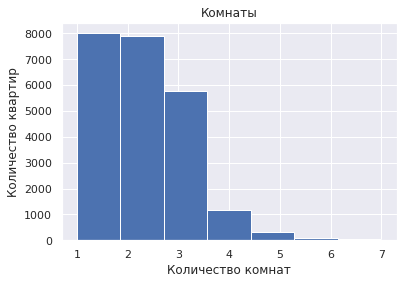

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


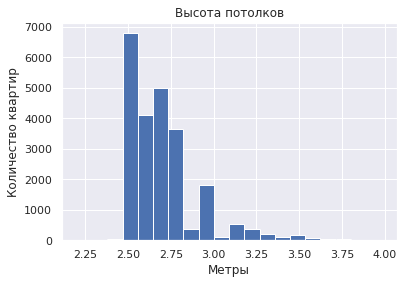

Наибольшие по высоте потолков варианты:
22869   100.00
22336    32.00
3148     32.00
21377    27.50
20478    27.00
5246     27.00
10773    27.00
21824    27.00
5807     27.00
4876     27.00
Name: ceiling_height, dtype: float64


In [7]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

# Работаем с потолками
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

**Вывод**  

**Площадь**

Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.

**Стоимость**

В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.
Комнаты
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.

**Высота потолков**

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.

**Квартирность**

Самые распространённые варианты 1-комнатные и 2х-комнатные квартиры( пики почти равны), на 2 пункта от них ниже по популярности 3х- комнвтные, и на 5 пунктов ниже 4х- комнатные квартиры. Квартиры с 5 и тем более с 6 комнатами идут как очень редкие варианты.


### Изучение времени продажи квартиры

Время продажи (медиана): 95 

Время продажи (среднее): 181 



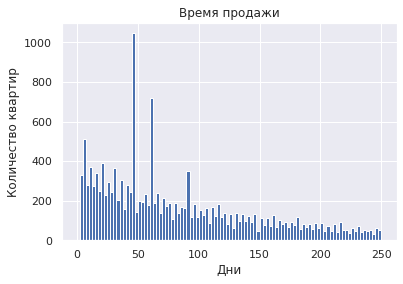

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

In [8]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

**Вывод**

Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

###  Работа с редкими и выбивающимися значениями

In [9]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio
count,"23,565.00","21,519.00","22,326.00","23,565.00","21,837.00","23,565.00","22,682.00","23,565.00","22,250.00","23,565.00","18,041.00","18,064.00","23,565.00","8,030.00","23,565.00","9,036.00","19,996.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
mean,9.88,"4,837,114.55",54.32,2.01,2.66,10.68,31.53,5.88,9.42,0.59,"28,797.08","14,192.66",0.47,490.58,0.59,518.29,162.41,"99,405.39",2.57,6.40,"2,017.37",56.10,18.14
std,5.68,"2,215,773.61",19.33,0.99,0.14,6.59,13.75,4.87,3.18,0.96,"12,632.50","8,613.35",0.75,341.57,0.88,278.01,177.72,"50,389.44",1.79,3.49,1.04,10.11,6.96
min,0.00,"12,190.00",12.00,0.00,2.25,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.00,0.00,1.00,"2,014.00",2.00,2.00
25%,6.00,"3,300,000.00",39.40,1.00,2.55,5.00,18.70,2.00,7.00,0.00,"18,565.00","9,238.00",0.00,288.00,0.00,293.00,44.00,"76,566.00",1.00,3.00,"2,017.00",50.00,13.00
50%,9.00,"4,400,000.00",50.00,2.00,2.64,9.00,30.00,4.00,9.00,0.00,"26,757.00","13,096.50",0.00,455.00,0.00,503.00,92.00,"95,000.00",3.00,6.00,"2,017.00",57.00,17.00
75%,14.00,"5,999,999.50",65.50,3.00,2.75,16.00,40.60,8.00,11.00,1.00,"37,273.00","16,285.00",1.00,612.00,1.00,730.00,217.00,"114,213.00",4.00,10.00,"2,018.00",63.00,22.00
max,50.00,"11,866,860.00",114.20,5.00,3.05,60.00,76.70,33.00,19.45,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00",907.00,"1,907,500.00",6.00,12.00,"2,019.00",100.00,78.00


**Вывод**

В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее.

### Определение факторов, влияющих на стоимость квартиры

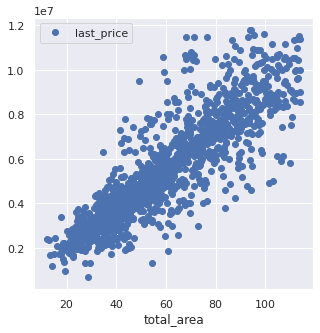

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



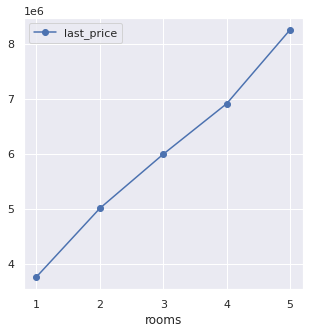

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.54
rooms             0.54   1.00 



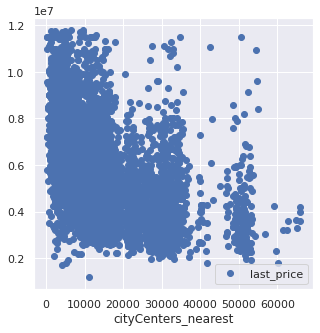

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.71
last_price                          0.71        1.00 



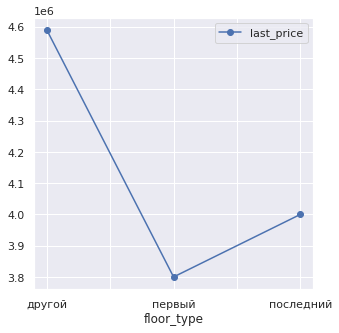

In [10]:
# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


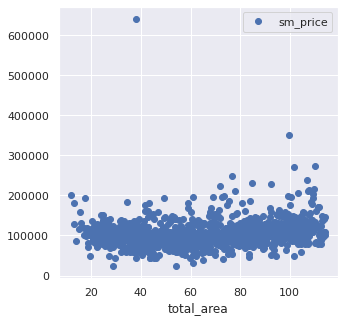

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price        1.00        0.05
total_area      0.05        1.00 



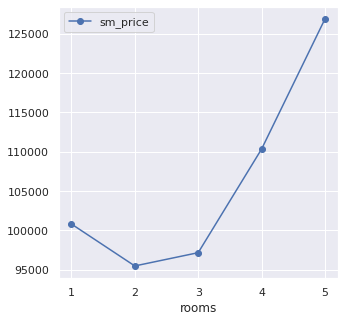

Корреляция цены за квадрат и числа комнат: 

          rooms  sm_price
rooms      1.00     -0.26
sm_price  -0.26      1.00 



In [11]:
# Зависимость цены за квадрат от площади
(
    data.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

**Вывод**

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.

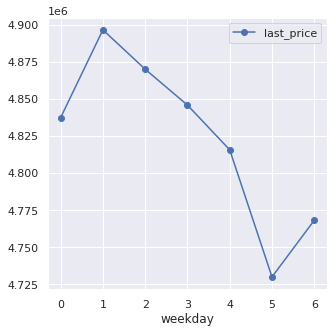

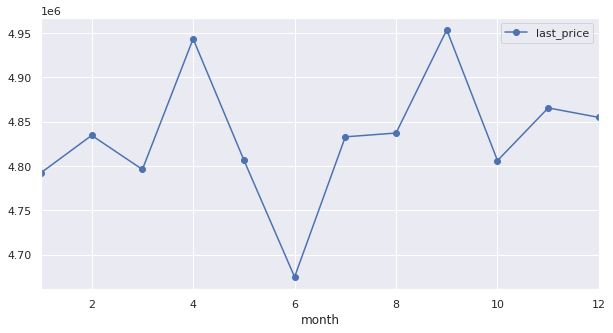

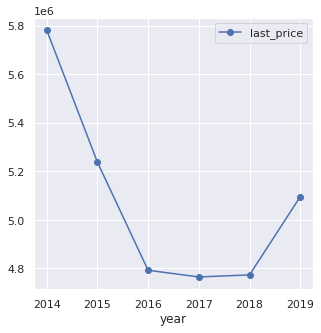

In [12]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

**Вывод**

Зависимость от дня, месяца и года
День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

###  Сравнение средней стоимости квадратного метра в топ-10 городов

In [13]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85672
посёлок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


**Вывод**

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

### Определяем границу центральной зоны

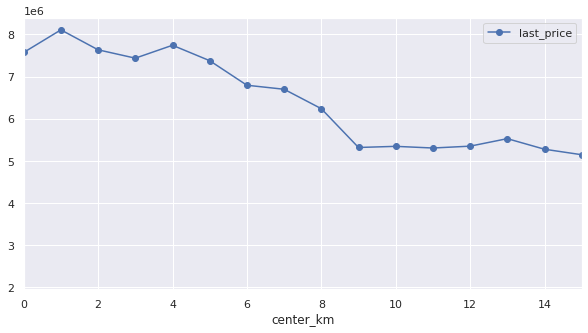

In [14]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

**Вывод**

Центральная зона - это 7 км и меньше. Дальше 7 км средняя цена на квартиры резко снижается.

### Анализ сегмента в центре

Площадь (медиана): 52 

Площадь в центре (медиана): 68 

Площадь (среднее): 56 

Площадь в центре (среднее): 69 



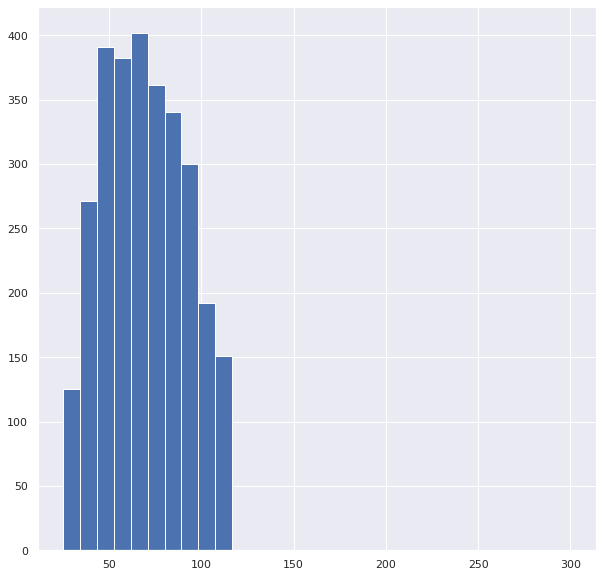

Число вариантов с ценой больше 20 млн: 0


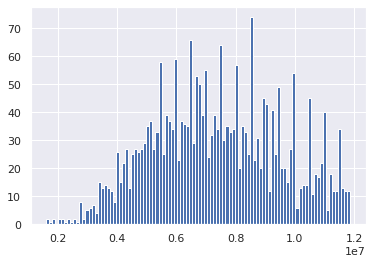

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4912,31.99,579,16.16,12.00
2,5082,33.09,1119,31.24,22.00
3,4107,26.74,1161,32.41,28.00
4,966,6.29,503,14.04,52.00
5,290,1.89,220,6.14,76.00


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.77 

Высота потолков (среднее): 2.679183579335793 

Высота потолков в центре (среднее): 2.790674381484437 



In [15]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')

# Изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

# Работаем со стоимостью
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

# Изучаем число комнат
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

# Изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

**Вывод**

Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).

Комнаты. В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Высота потолков в центре выше в среднем на 12 сантиметров.

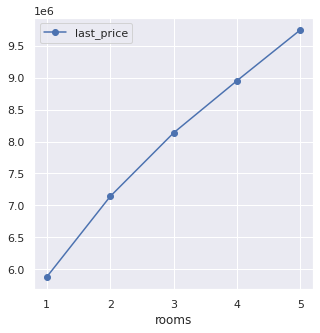

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00  -0.14
rooms            -0.14   1.00 



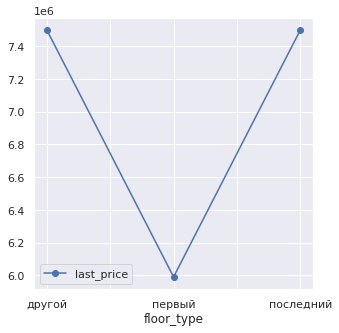

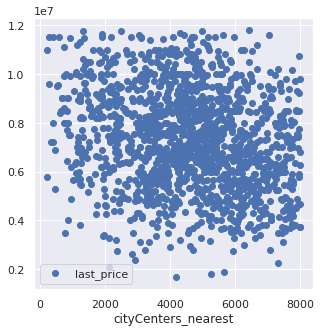

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.12
last_price                          0.12        1.00 



In [16]:
# Зависимость цены от числа комнат
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость цены от удалённости от центра
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')


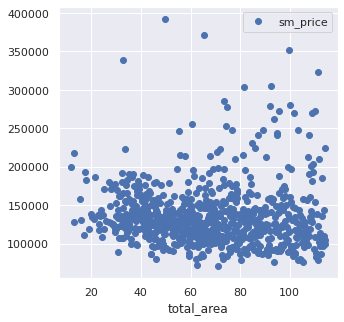

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price        1.00       -0.01
total_area     -0.01        1.00 



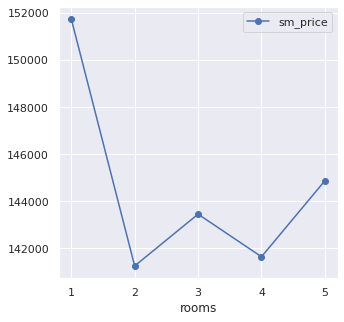

Корреляция цены за квадрат и числа комнат: 

          rooms  sm_price
rooms      1.00     -0.05
sm_price  -0.05      1.00 



In [17]:
# Зависимость цены за квадрат от площади
(
    spb_center.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(spb_center.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    spb_center.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')


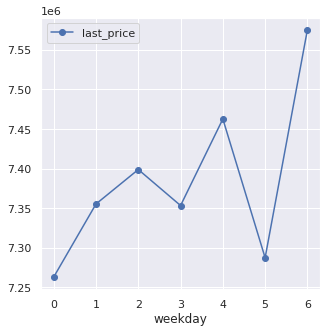

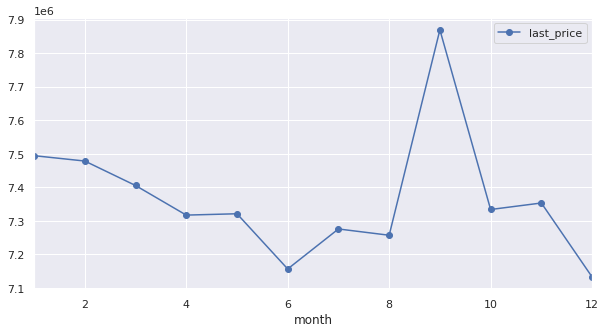

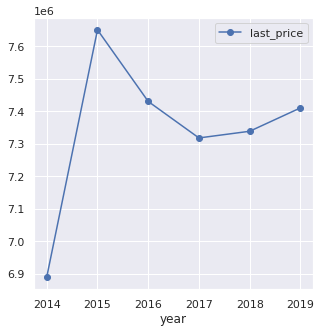

In [18]:
# Зависимость от дня размещения
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


**Вывод**
* Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу
* В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
* В центре есть очень дорогие однокомнатные квартиры
* В центральной зоне почти нет зависимости от удалённости от центра города. * Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
* В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре (вероятно, перед Новым годом люди хотят сделать подарок)
* Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году. Это сложно объяснить, т.к. стоимость менее элитной недвижимости упала после обвала рубля в 2014 году

## Общий вывод

**Срок продажи квартиры**

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

**Факторы, влияющие на стоимость**

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

**Стоимость квадратного метра в топ-10 населённых пунктов**

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

**Факторы, влияющие на стоимость в центре Санкт-Петербурга**

В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры
Экономическая ситуация в стране мало влияет на элитную недвижимость в центре